# Data Visualizer

Code heavily borrowed from the [blackbox repository](https://github.com/martius-lab/blackbox-differentiation-combinatorial-solvers)


## Utility Functions

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Warcraft Shortest Path

Train images shape:  (10000, 96, 96, 3)
Train labels shape:  (10000, 12, 12)
Weights shape: (10000, 12, 12)
label value:  [[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


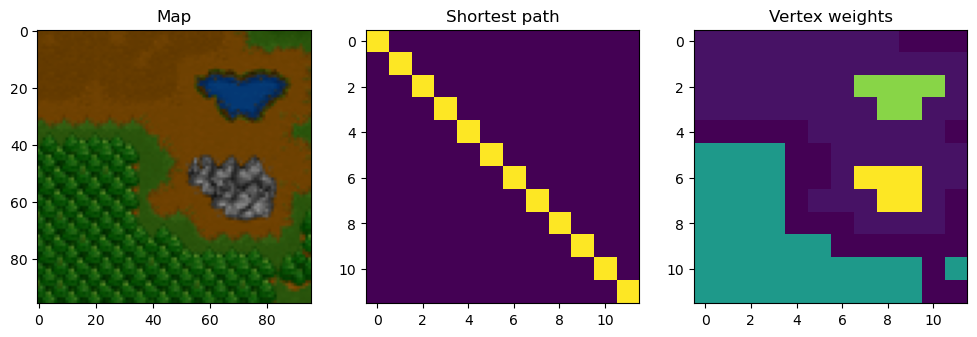

In [15]:
import os
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

data_dir = './data/warcraft_shortest_path_oneskin/12x12/'

data_suffix = "maps"
train_prefix = "train"


train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
train_weights = np.load(os.path.join(data_dir, train_prefix + "_vertex_weights.npy"))
train_labels = np.load(os.path.join(data_dir, train_prefix + "_shortest_paths.npy"))

#images = train_inputs.transpose(0,2,3,1).astype(np.uint8)
images = train_inputs

print("Train images shape: ", train_inputs.shape)
print("Train labels shape: ",  train_labels.shape)
print("Weights shape:", train_weights.shape)

idx = 10
im = images[idx]
label = train_labels[idx]
weights = train_weights[idx]
print("label value: ", label)

fig, ax = plt.subplots(1,3, figsize=(12,12))

ax[0].imshow(im.astype(np.uint8))
ax[0].set_title("Map")
ax[1].imshow(label)
ax[1].set_title("Shortest path")
ax[2].set_title("Vertex weights")
ax[2].imshow(weights.astype(np.float32))

fig.savefig("warcraft_example.png", dpi=600, transparent=True, bbox_inches='tight')

# MNIST Min-cost Perfect Matching

Downloading the dataset

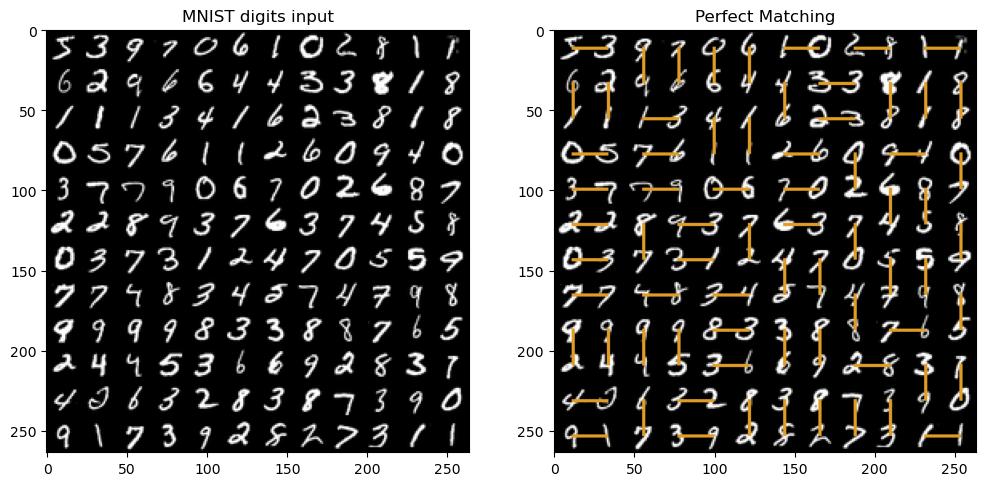

In [16]:
import itertools
import functools
from PIL import Image, ImageDraw

def perfect_matching_vis_2(grid_img, grid_dim, labels, color=(0,255,255), width=2, offset=0, edges_list=None):
    edges = edges_list 

    pixels_per_cell = int(grid_img.shape[0]/grid_dim)
        
    img = Image.fromarray(np.uint8(grid_img.squeeze())).convert("RGB")
    # print(labels)
    # exit(0)
    for i, (u, v) in enumerate(edges):
        y1, x1, y2, x2 = u%grid_dim, u//grid_dim, v%grid_dim, v//grid_dim
        if labels[i]>0.5:
            draw = ImageDraw.Draw(img)
            if x1 == x2:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 , y1*pixels_per_cell + pixels_per_cell/2 + offset,
                x2*pixels_per_cell + pixels_per_cell/2, y2*pixels_per_cell + pixels_per_cell/2 - offset), fill=color,width=width)
            else:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 + offset, y1*pixels_per_cell + pixels_per_cell/2,
                x2*pixels_per_cell + pixels_per_cell/2 - offset, y2*pixels_per_cell + pixels_per_cell/2), fill=color,width=width)
            del draw

    return np.asarray(img, dtype=np.uint8)
import pickle
path = './data/mnist_matching_grayscale/12x12_mnist_nonunique/pm_12_mini_10.pkl'
with open(path, 'rb') as file:
    data = pickle.load(file)

train_inputs = data['train']['z']
train_labels = data['train']['sol']
edges_list = data['edges_list']
images = train_inputs.transpose(0,2,3,1).astype(np.uint8)


img_idx = 2

# plt.title("Example training data point")
# plt.imshow(images[img_idx], cmap="gray")
labeled_image = perfect_matching_vis_2(images[img_idx], 12, train_labels[img_idx], color="#e19c24", width=2, edges_list=edges_list)
# plt.imshow(labeled_image)

fig, ax = plt.subplots(1,2, figsize=(12,12))

ax[0].imshow(images[img_idx], cmap="gray")
ax[0].set_title("MNIST digits input")
ax[1].imshow(labeled_image)
ax[1].set_title("Perfect Matching")
# ax[2].set_title("Vertex weights")
# ax[2].imshow(weights.astype(np.float32))
fig.savefig("mnist_matching_example.png", dpi=600, transparent=True, bbox_inches='tight')